In [ ]:
!pip install nilearn scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 41.9 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import pandas as pd
import nilearn.datasets as ds
import matplotlib.pyplot as plt
from nilearn import datasets
from nilearn.input_data import NiftiMasker
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import (accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import warnings, time
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_predict

warnings.filterwarnings("ignore", message=".*no sform in its header.*", category=UserWarning)
warnings.filterwarnings("ignore", category=UserWarning)

**Section 2. KNN**



=== Subject 1 ===


[_add_readme_to_default_data_locations] Added README.md to ../data

[get_dataset_dir] Dataset created in ../data/haxby2001

[fetch_single_file] Downloading data from https://www.nitrc.org/frs/download.php/7868/mask.nii.gz ...

[fetch_single_file]  ...done. (0 seconds, 0 min)

[fetch_single_file] Downloading data from http://data.pymvpa.org/datasets/haxby2001/MD5SUMS ...

[fetch_single_file]  ...done. (0 seconds, 0 min)

[fetch_single_file] Downloading data from http://data.pymvpa.org/datasets/haxby2001/subj1-2010.01.14.tar.gz ...

[_chunk_report_] Downloaded 103440384 of 314803244 bytes (32.9%%,    2.0s remaining)

[_chunk_report_] Downloaded 163168256 of 314803244 bytes (51.8%%,    1.9s remaining)

[_chunk_report_] Downloaded 222683136 of 314803244 bytes (70.7%%,    1.2s remaining)

[_chunk_report_] Downloaded 284737536 of 314803244 bytes (90.4%%,    0.4s remaining)

[fetch_single_file]  ...done. (5 seconds, 0 min)

[uncompress_file] Extracting data from 
../data/haxby2001/9cbdfe22144f858ab0d4958f8162e296/subj1-2010.01.14.tar.gz...

[uncompress_file] .. done.

[fetch_single_file] Downloading data from http://data.pymvpa.org/datasets/haxby2001/stimuli-2010.01.14.tar.gz ...

[fetch_single_file]  ...done. (0 seconds, 0 min)

[uncompress_file] Extracting data from 
../data/haxby2001/ee9e0d5a40146477e9197f0d13da9b32/stimuli-2010.01.14.tar.gz...

[uncompress_file] .. done.

X shape (time×voxels): (1452, 577)

K = 2 → accuracy = 0.869, macro-sensitivity = 0.895
   Sensitivity(bottle) = 0.944
   Sensitivity(cat) = 0.963
   Sensitivity(chair) = 0.889
   Sensitivity(face) = 0.972
   Sensitivity(house) = 0.981
   Sensitivity(rest) = 0.816
   Sensitivity(scissors) = 0.870
   Sensitivity(scrambledpix) = 0.843
   Sensitivity(shoe) = 0.778

K = 3 → accuracy = 0.892, macro-sensitivity = 0.907
   Sensitivity(bottle) = 0.880
   Sensitivity(cat) = 0.889
   Sensitivity(chair) = 0.870
   Sensitivity(face) = 0.963
   Sensitivity(house) = 0.981
   Sensitivity(rest) = 0.862
   Sensitivity(scissors) = 0.926
   Sensitivity(scrambledpix) = 0.889
   Sensitivity(shoe) = 0.898

K = 4 → accuracy = 0.894, macro-sensitivity = 0.906
   Sensitivity(bottle) = 0.907
   Sensitivity(cat) = 0.898
   Sensitivity(chair) = 0.880
   Sensitivity(face) = 0.972
   Sensitivity(house) = 0.981
   Sensitivity(rest) = 0.869
   Sensitivity(scissors) = 0.917
   Sensitivity(scrambledpix) = 0.898
   Sens

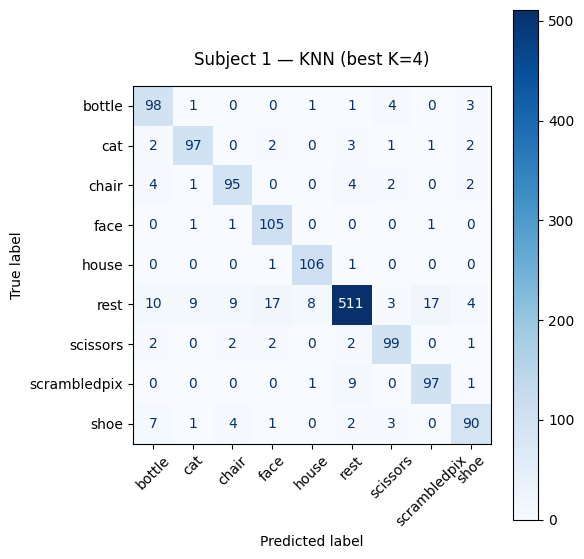


=== Subject 2 ===


[get_dataset_dir] Dataset found in ../data/haxby2001

[fetch_single_file] Downloading data from http://data.pymvpa.org/datasets/haxby2001/subj2-2010.01.14.tar.gz ...

[_chunk_report_] Downloaded 121413632 of 291168628 bytes (41.7%%,    1.4s remaining)

[_chunk_report_] Downloaded 224428032 of 291168628 bytes (77.1%%,    0.6s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[uncompress_file] Extracting data from 
../data/haxby2001/9cabe068089e791ef0c5fe930fc20e30/subj2-2010.01.14.tar.gz...

[uncompress_file] .. done.

X shape (time×voxels): (1452, 464)

K = 2 → accuracy = 0.836, macro-sensitivity = 0.833
   Sensitivity(bottle) = 0.935
   Sensitivity(cat) = 0.917
   Sensitivity(chair) = 0.852
   Sensitivity(face) = 0.852
   Sensitivity(house) = 0.972
   Sensitivity(rest) = 0.842
   Sensitivity(scissors) = 0.769
   Sensitivity(scrambledpix) = 0.741
   Sensitivity(shoe) = 0.620

K = 3 → accuracy = 0.871, macro-sensitivity = 0.880
   Sensitivity(bottle) = 0.870
   Sensitivity(cat) = 0.935
   Sensitivity(chair) = 0.852
   Sensitivity(face) = 0.917
   Sensitivity(house) = 0.963
   Sensitivity(rest) = 0.852
   Sensitivity(scissors) = 0.889
   Sensitivity(scrambledpix) = 0.889
   Sensitivity(shoe) = 0.750

K = 4 → accuracy = 0.865, macro-sensitivity = 0.870
   Sensitivity(bottle) = 0.889
   Sensitivity(cat) = 0.935
   Sensitivity(chair) = 0.806
   Sensitivity(face) = 0.889
   Sensitivity(house) = 0.981
   Sensitivity(rest) = 0.855
   Sensitivity(scissors) = 0.870
   Sensitivity(scrambledpix) = 0.870
   Sens

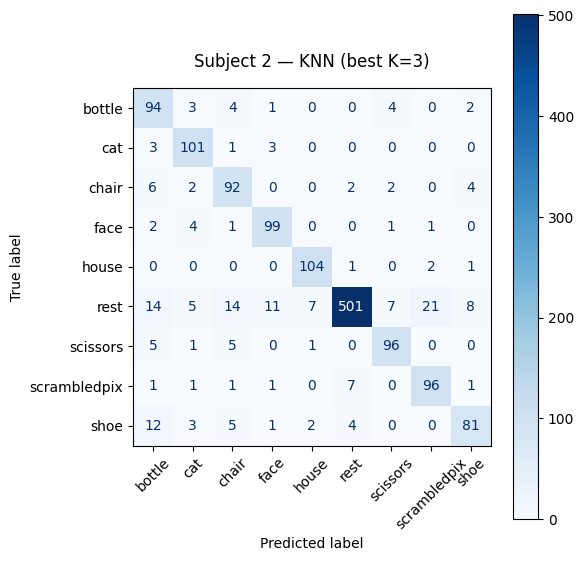


=== Subject 3 ===


[get_dataset_dir] Dataset found in ../data/haxby2001

[fetch_single_file] Downloading data from http://data.pymvpa.org/datasets/haxby2001/subj3-2010.01.14.tar.gz ...

[_chunk_report_] Downloaded 111427584 of 296936090 bytes (37.5%%,    1.7s remaining)

[_chunk_report_] Downloaded 277422080 of 296936090 bytes (93.4%%,    0.1s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[uncompress_file] Extracting data from 
../data/haxby2001/ace0580c761d5f6a3d22aa6973c2aefa/subj3-2010.01.14.tar.gz...

[uncompress_file] .. done.

X shape (time×voxels): (1452, 307)

K = 2 → accuracy = 0.676, macro-sensitivity = 0.647
   Sensitivity(bottle) = 0.806
   Sensitivity(cat) = 0.796
   Sensitivity(chair) = 0.657
   Sensitivity(face) = 0.731
   Sensitivity(house) = 0.833
   Sensitivity(rest) = 0.735
   Sensitivity(scissors) = 0.398
   Sensitivity(scrambledpix) = 0.417
   Sensitivity(shoe) = 0.454

K = 3 → accuracy = 0.727, macro-sensitivity = 0.714
   Sensitivity(bottle) = 0.750
   Sensitivity(cat) = 0.787
   Sensitivity(chair) = 0.639
   Sensitivity(face) = 0.787
   Sensitivity(house) = 0.880
   Sensitivity(rest) = 0.753
   Sensitivity(scissors) = 0.556
   Sensitivity(scrambledpix) = 0.630
   Sensitivity(shoe) = 0.648

K = 4 → accuracy = 0.734, macro-sensitivity = 0.706
   Sensitivity(bottle) = 0.685
   Sensitivity(cat) = 0.796
   Sensitivity(chair) = 0.620
   Sensitivity(face) = 0.778
   Sensitivity(house) = 0.889
   Sensitivity(rest) = 0.791
   Sensitivity(scissors) = 0.583
   Sensitivity(scrambledpix) = 0.639
   Sens

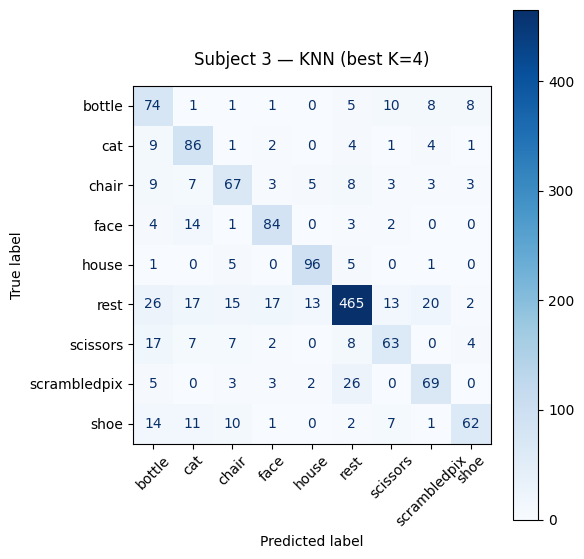


=== Subject 4 ===


[get_dataset_dir] Dataset found in ../data/haxby2001

[fetch_single_file] Downloading data from http://data.pymvpa.org/datasets/haxby2001/subj4-2010.01.14.tar.gz ...

[_chunk_report_] Downloaded 131088384 of 329954386 bytes (39.7%%,    1.5s remaining)

[_chunk_report_] Downloaded 282451968 of 329954386 bytes (85.6%%,    0.3s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[uncompress_file] Extracting data from 
../data/haxby2001/f22a095aa8a576176ef6267f6ac4ef83/subj4-2010.01.14.tar.gz...

[uncompress_file] .. done.

X shape (time×voxels): (1452, 675)

K = 2 → accuracy = 0.752, macro-sensitivity = 0.788
   Sensitivity(bottle) = 0.898
   Sensitivity(cat) = 0.833
   Sensitivity(chair) = 0.824
   Sensitivity(face) = 0.889
   Sensitivity(house) = 0.898
   Sensitivity(rest) = 0.679
   Sensitivity(scissors) = 0.722
   Sensitivity(scrambledpix) = 0.759
   Sensitivity(shoe) = 0.593

K = 3 → accuracy = 0.774, macro-sensitivity = 0.803
   Sensitivity(bottle) = 0.833
   Sensitivity(cat) = 0.787
   Sensitivity(chair) = 0.741
   Sensitivity(face) = 0.870
   Sensitivity(house) = 0.870
   Sensitivity(rest) = 0.716
   Sensitivity(scissors) = 0.778
   Sensitivity(scrambledpix) = 0.880
   Sensitivity(shoe) = 0.750

K = 4 → accuracy = 0.775, macro-sensitivity = 0.786
   Sensitivity(bottle) = 0.815
   Sensitivity(cat) = 0.731
   Sensitivity(chair) = 0.769
   Sensitivity(face) = 0.833
   Sensitivity(house) = 0.861
   Sensitivity(rest) = 0.752
   Sensitivity(scissors) = 0.787
   Sensitivity(scrambledpix) = 0.852
   Sens

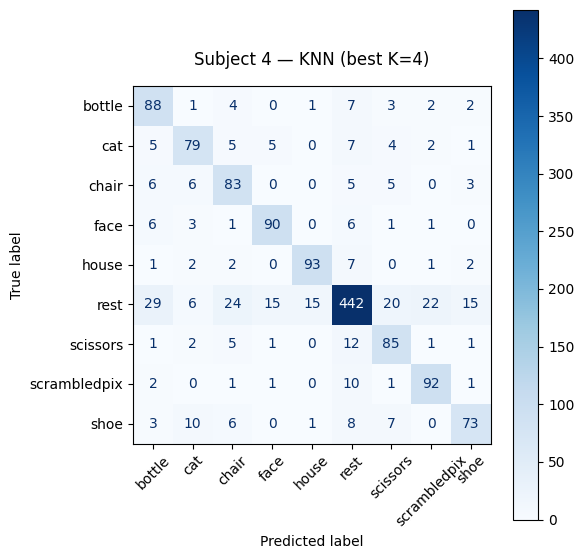


=== Subject 5 ===


[get_dataset_dir] Dataset found in ../data/haxby2001

[fetch_single_file] Downloading data from http://data.pymvpa.org/datasets/haxby2001/subj5-2010.01.14.tar.gz ...

[_chunk_report_] Downloaded 125984768 of 322730263 bytes (39.0%%,    1.6s remaining)

[_chunk_report_] Downloaded 271409152 of 322730263 bytes (84.1%%,    0.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[uncompress_file] Extracting data from 
../data/haxby2001/1889bffbba3b9f8358e7c604eb2df624/subj5-2010.01.14.tar.gz...

[uncompress_file] .. done.

X shape (time×voxels): (1452, 422)

K = 2 → accuracy = 0.731, macro-sensitivity = 0.723
   Sensitivity(bottle) = 0.717
   Sensitivity(cat) = 0.859
   Sensitivity(chair) = 0.889
   Sensitivity(face) = 0.869
   Sensitivity(house) = 0.859
   Sensitivity(rest) = 0.745
   Sensitivity(scissors) = 0.566
   Sensitivity(scrambledpix) = 0.515
   Sensitivity(shoe) = 0.485

K = 3 → accuracy = 0.773, macro-sensitivity = 0.761
   Sensitivity(bottle) = 0.697
   Sensitivity(cat) = 0.848
   Sensitivity(chair) = 0.818
   Sensitivity(face) = 0.879
   Sensitivity(house) = 0.798
   Sensitivity(rest) = 0.791
   Sensitivity(scissors) = 0.677
   Sensitivity(scrambledpix) = 0.747
   Sensitivity(shoe) = 0.596

K = 4 → accuracy = 0.789, macro-sensitivity = 0.768
   Sensitivity(bottle) = 0.606
   Sensitivity(cat) = 0.899
   Sensitivity(chair) = 0.838
   Sensitivity(face) = 0.869
   Sensitivity(house) = 0.848
   Sensitivity(rest) = 0.821
   Sensitivity(scissors) = 0.687
   Sensitivity(scrambledpix) = 0.667
   Sens

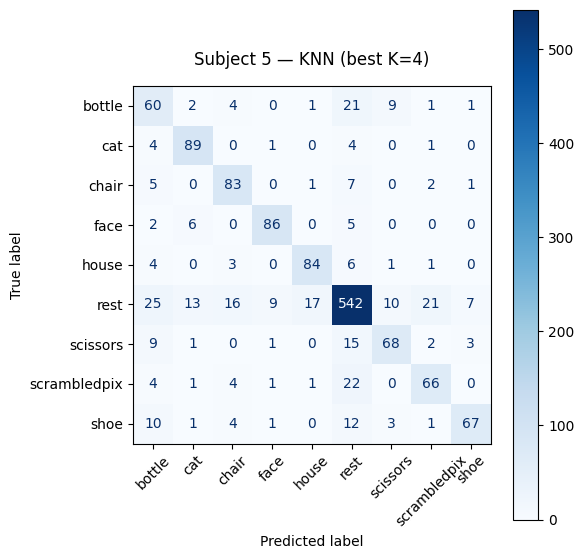


=== Subject 6 ===


[get_dataset_dir] Dataset found in ../data/haxby2001

[fetch_single_file] Downloading data from http://data.pymvpa.org/datasets/haxby2001/subj6-2010.01.14.tar.gz ...

[_chunk_report_] Downloaded 107143168 of 322839597 bytes (33.2%%,    2.0s remaining)

[_chunk_report_] Downloaded 192798720 of 322839597 bytes (59.7%%,    1.3s remaining)

[_chunk_report_] Downloaded 282263552 of 322839597 bytes (87.4%%,    0.4s remaining)

[fetch_single_file]  ...done. (4 seconds, 0 min)

[uncompress_file] Extracting data from 
../data/haxby2001/6de6a0e115e889bc0af433b0c384b80c/subj6-2010.01.14.tar.gz...

[uncompress_file] .. done.

X shape (time×voxels): (1452, 348)

K = 2 → accuracy = 0.570, macro-sensitivity = 0.507
   Sensitivity(bottle) = 0.528
   Sensitivity(cat) = 0.648
   Sensitivity(chair) = 0.389
   Sensitivity(face) = 0.713
   Sensitivity(house) = 0.778
   Sensitivity(rest) = 0.699
   Sensitivity(scissors) = 0.324
   Sensitivity(scrambledpix) = 0.343
   Sensitivity(shoe) = 0.139

K = 3 → accuracy = 0.628, macro-sensitivity = 0.563
   Sensitivity(bottle) = 0.583
   Sensitivity(cat) = 0.657
   Sensitivity(chair) = 0.380
   Sensitivity(face) = 0.731
   Sensitivity(house) = 0.787
   Sensitivity(rest) = 0.760
   Sensitivity(scissors) = 0.426
   Sensitivity(scrambledpix) = 0.407
   Sensitivity(shoe) = 0.333

K = 4 → accuracy = 0.641, macro-sensitivity = 0.566
   Sensitivity(bottle) = 0.565
   Sensitivity(cat) = 0.630
   Sensitivity(chair) = 0.361
   Sensitivity(face) = 0.759
   Sensitivity(house) = 0.778
   Sensitivity(rest) = 0.794
   Sensitivity(scissors) = 0.426
   Sensitivity(scrambledpix) = 0.435
   Sens

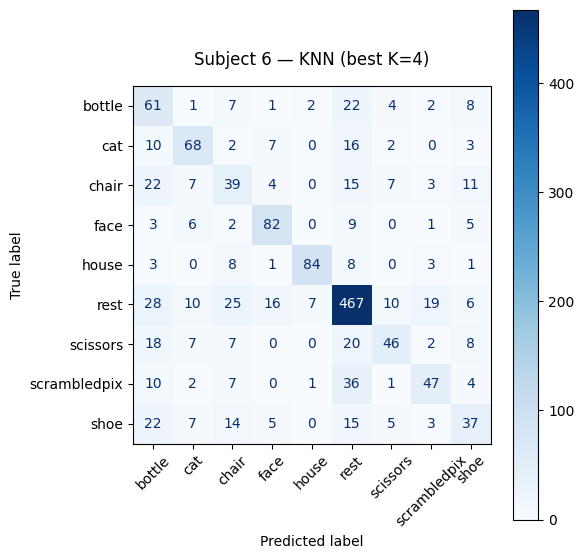

In [ ]:
Ks = [2, 3, 4]
subjects = [1, 2, 3, 4, 5, 6]

data_dir = os.path.join('..', 'data')

for subj in subjects:
    print(f"\n=== Subject {subj} ===")
    # Load data for this specific subject
    haxby = datasets.fetch_haxby(data_dir=data_dir, subjects=[subj], fetch_stimuli=True)
    masker = NiftiMasker(mask_img=haxby.mask_vt[0], standardize=True, detrend=True)
    X = masker.fit_transform(haxby.func[0])
    print(f'X shape (time×voxels): {X.shape}')
    labels_df = pd.read_csv(haxby.session_target[0], sep=' ')
    y = labels_df['labels'].values
    labels = np.unique(y)

    # Initialize trackers for the best K
    best_acc = -np.inf
    best_k   = None
    best_cm  = None

    # Iterate over each K value
    for k in Ks:
        loo    = LeaveOneOut()
        clf    = KNeighborsClassifier(n_neighbors=k)
        y_pred = np.empty_like(y, dtype=object)

        # Perform Leave-One-Out cross-validation
        for train_idx, test_idx in loo.split(X):
            clf.fit(X[train_idx], y[train_idx])
            y_pred[test_idx] = clf.predict(X[test_idx])

        # Compute accuracy and sensitivity metrics
        acc            = accuracy_score(y, y_pred)
        macro_sens     = recall_score(y, y_pred, average='macro')
        sens_per_class = recall_score(y, y_pred, labels=labels, average=None)

        # Print results for this K
        print(f"\nK = {k} → accuracy = {acc:.3f}, macro-sensitivity = {macro_sens:.3f}")
        for lbl, sens in zip(labels, sens_per_class):
            print(f"   Sensitivity({lbl}) = {sens:.3f}")

        # Update best_K if current accuracy is higher
        if acc > best_acc:
            best_acc = acc
            best_k   = k
            best_cm  = confusion_matrix(y, y_pred, labels=labels)

    # After testing all Ks, display the confusion matrix for the best K
    print(f"\n→ Subject {subj}: best K = {best_k}  (accuracy = {best_acc:.3f})\n")
    disp = ConfusionMatrixDisplay(confusion_matrix=best_cm,
                                  display_labels=labels)
    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=True, xticks_rotation=45)
    ax.set_title(f"Subject {subj} — KNN (best K={best_k})", pad=15)
    plt.tight_layout()
    plt.show()

#### **Section 3. Logistic‑Regression classifier**






=======  Subject 1  =======


[_add_readme_to_default_data_locations] Added README.md to /root/nilearn_data

[get_dataset_dir] Dataset created in /root/nilearn_data/haxby2001

[fetch_single_file] Downloading data from https://www.nitrc.org/frs/download.php/7868/mask.nii.gz ...

[fetch_single_file]  ...done. (0 seconds, 0 min)

[fetch_single_file] Downloading data from http://data.pymvpa.org/datasets/haxby2001/MD5SUMS ...

[fetch_single_file]  ...done. (0 seconds, 0 min)

[fetch_single_file] Downloading data from http://data.pymvpa.org/datasets/haxby2001/subj1-2010.01.14.tar.gz ...

[_chunk_report_] Downloaded 171474944 of 314803244 bytes (54.5%%,    0.8s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[uncompress_file] Extracting data from 
/root/nilearn_data/haxby2001/9cbdfe22144f858ab0d4958f8162e296/subj1-2010.01.14.tar.gz...

[uncompress_file] .. done.

[fetch_single_file] Downloading data from http://data.pymvpa.org/datasets/haxby2001/stimuli-2010.01.14.tar.gz ...

[fetch_single_file]  ...done. (0 seconds, 0 min)

[uncompress_file] Extracting data from 
/root/nilearn_data/haxby2001/ee9e0d5a40146477e9197f0d13da9b32/stimuli-2010.01.14.tar.gz...

[uncompress_file] .. done.

Accuracy = 0.861   (1452 folds)   Elapsed: 98.5s


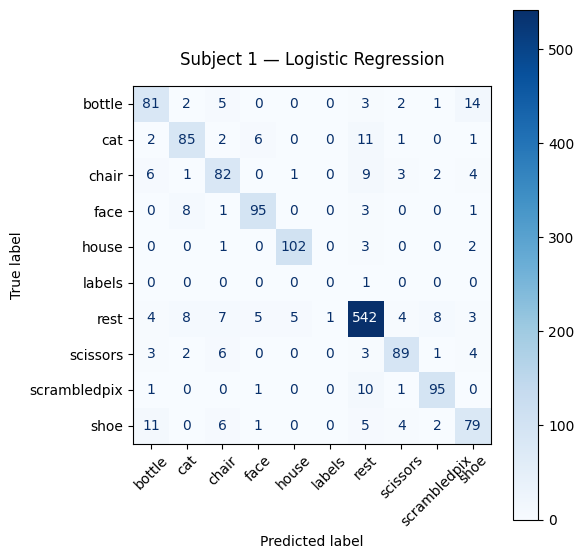


=======  Subject 2  =======


[get_dataset_dir] Dataset found in /root/nilearn_data/haxby2001

[fetch_single_file] Downloading data from http://data.pymvpa.org/datasets/haxby2001/subj2-2010.01.14.tar.gz ...

[_chunk_report_] Downloaded 99926016 of 291168628 bytes (34.3%%,    1.9s remaining)

[_chunk_report_] Downloaded 215629824 of 291168628 bytes (74.1%%,    0.7s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[uncompress_file] Extracting data from 
/root/nilearn_data/haxby2001/9cabe068089e791ef0c5fe930fc20e30/subj2-2010.01.14.tar.gz...

[uncompress_file] .. done.

Accuracy = 0.800   (1452 folds)   Elapsed: 102.3s


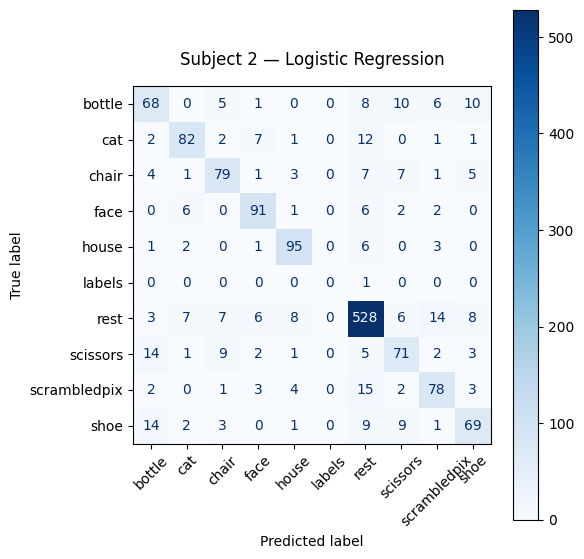


=======  Subject 3  =======


[get_dataset_dir] Dataset found in /root/nilearn_data/haxby2001

[fetch_single_file] Downloading data from http://data.pymvpa.org/datasets/haxby2001/subj3-2010.01.14.tar.gz ...

[_chunk_report_] Downloaded 119160832 of 296936090 bytes (40.1%%,    1.5s remaining)

[_chunk_report_] Downloaded 213819392 of 296936090 bytes (72.0%%,    0.8s remaining)

[_chunk_report_] Downloaded 280281088 of 296936090 bytes (94.4%%,    0.2s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[uncompress_file] Extracting data from 
/root/nilearn_data/haxby2001/ace0580c761d5f6a3d22aa6973c2aefa/subj3-2010.01.14.tar.gz...

[uncompress_file] .. done.

Accuracy = 0.787   (1452 folds)   Elapsed: 99.6s


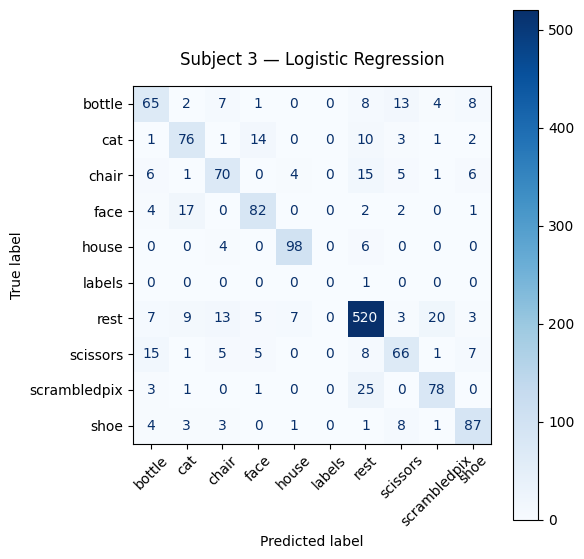


=======  Subject 4  =======


[get_dataset_dir] Dataset found in /root/nilearn_data/haxby2001

[fetch_single_file] Downloading data from http://data.pymvpa.org/datasets/haxby2001/subj4-2010.01.14.tar.gz ...

[_chunk_report_] Downloaded 143949824 of 329954386 bytes (43.6%%,    1.3s remaining)

[_chunk_report_] Downloaded 235356160 of 329954386 bytes (71.3%%,    0.8s remaining)

[_chunk_report_] Downloaded 237346816 of 329954386 bytes (71.9%%,    1.2s remaining)

[_chunk_report_] Downloaded 239321088 of 329954386 bytes (72.5%%,    1.5s remaining)

[_chunk_report_] Downloaded 241229824 of 329954386 bytes (73.1%%,    1.8s remaining)

[_chunk_report_] Downloaded 316547072 of 329954386 bytes (95.9%%,    0.3s remaining)

[fetch_single_file]  ...done. (6 seconds, 0 min)

[uncompress_file] Extracting data from 
/root/nilearn_data/haxby2001/f22a095aa8a576176ef6267f6ac4ef83/subj4-2010.01.14.tar.gz...

[uncompress_file] .. done.

Accuracy = 0.811   (1452 folds)   Elapsed: 113.8s


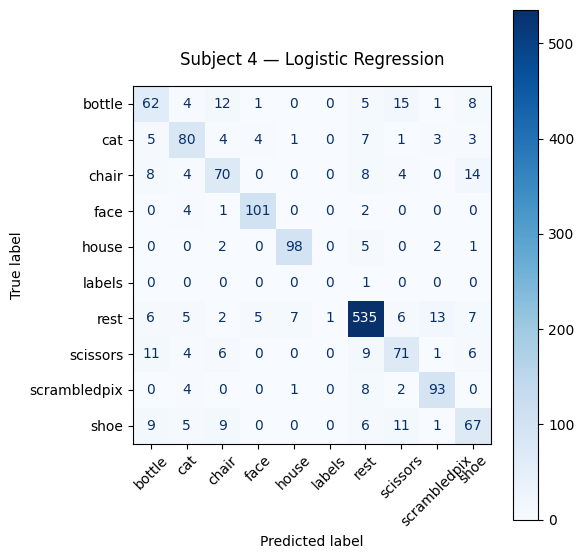


=======  Subject 5  =======


[get_dataset_dir] Dataset found in /root/nilearn_data/haxby2001

[fetch_single_file] Downloading data from http://data.pymvpa.org/datasets/haxby2001/subj5-2010.01.14.tar.gz ...

[_chunk_report_] Downloaded 123502592 of 322730263 bytes (38.3%%,    1.6s remaining)

[_chunk_report_] Downloaded 227164160 of 322730263 bytes (70.4%%,    0.8s remaining)

[fetch_single_file]  ...done. (3 seconds, 0 min)

[uncompress_file] Extracting data from 
/root/nilearn_data/haxby2001/1889bffbba3b9f8358e7c604eb2df624/subj5-2010.01.14.tar.gz...

[uncompress_file] .. done.

Accuracy = 0.878   (1452 folds)   Elapsed: 94.9s


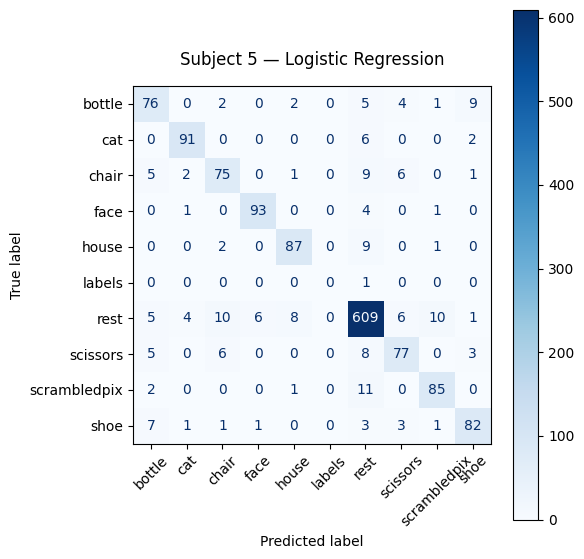


=======  Subject 6  =======


[get_dataset_dir] Dataset found in /root/nilearn_data/haxby2001

[fetch_single_file] Downloading data from http://data.pymvpa.org/datasets/haxby2001/subj6-2010.01.14.tar.gz ...

[_chunk_report_] Downloaded 155770880 of 322839597 bytes (48.3%%,    1.1s remaining)

[_chunk_report_] Downloaded 232079360 of 322839597 bytes (71.9%%,    0.8s remaining)

[_chunk_report_] Downloaded 234012672 of 322839597 bytes (72.5%%,    1.1s remaining)

[_chunk_report_] Downloaded 235970560 of 322839597 bytes (73.1%%,    1.5s remaining)

[_chunk_report_] Downloaded 237944832 of 322839597 bytes (73.7%%,    1.8s remaining)

[_chunk_report_] Downloaded 239894528 of 322839597 bytes (74.3%%,    2.1s remaining)

[_chunk_report_] Downloaded 256868352 of 322839597 bytes (79.6%%,    1.8s remaining)

[fetch_single_file]  ...done. (8 seconds, 0 min)

[uncompress_file] Extracting data from 
/root/nilearn_data/haxby2001/6de6a0e115e889bc0af433b0c384b80c/subj6-2010.01.14.tar.gz...

[uncompress_file] .. done.

Accuracy = 0.815   (1452 folds)   Elapsed: 100.3s


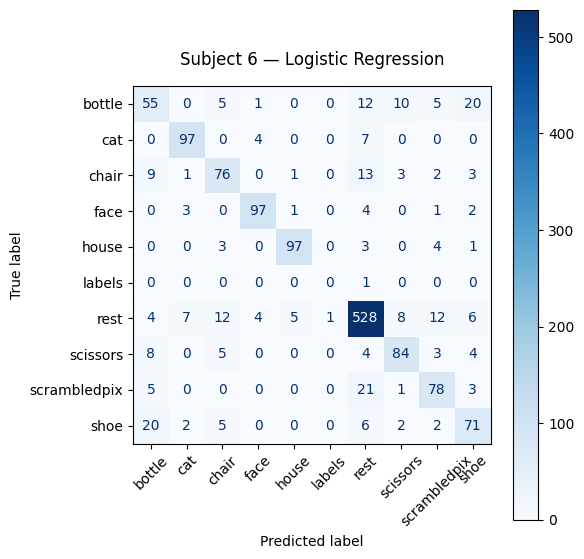

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)   # silence the spam

n_components = 50

for subj in subjects:
    t0 = time.time()
    print(f"\n=======  Subject {subj}  =======")

    # Load & vectorise
    haxby  = ds.fetch_haxby(subjects=[subj], fetch_stimuli=True)
    masker = NiftiMasker(mask_img=haxby.mask_vt[0],
                         standardize=True, detrend=True)
    X = masker.fit_transform(haxby.func[0])

    y = np.loadtxt(haxby.session_target[0], dtype=str, usecols=0)
    labels = np.unique(y)

    # Pre‑fit PCA once
    pca = PCA(n_components=n_components, svd_solver="full", random_state=0)
    X_red  = pca.fit_transform(X)

    # Classifier
    clf = make_pipeline(
        StandardScaler(),                 # scales the 50 PCA components
        LogisticRegression(solver="lbfgs", C=1.0, max_iter=500,n_jobs=-1, random_state=0) # use all cores
    )

    # LOO CV
    loo    = LeaveOneOut()
    y_true, y_pred = [], []

    for train_idx, test_idx in loo.split(X_red):
        clf.fit(X_red[train_idx], y[train_idx])
        y_pred.append(clf.predict(X_red[test_idx])[0])
        y_true.append(y[test_idx][0])

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Metrics & plot
    acc = (y_true == y_pred).mean()
    print(f"Accuracy = {acc:.3f}   ({y_true.size} folds)   "
          f"Elapsed: {time.time()-t0:.1f}s")

    cm  = confusion_matrix(y_true, y_pred, labels=labels)
    fig, ax = plt.subplots(figsize=(6, 6))
    ConfusionMatrixDisplay(cm, display_labels=labels).plot(
        ax=ax, cmap=plt.cm.Blues, colorbar=True, xticks_rotation=45)
    ax.set_title(f"Subject {subj} — Logistic Regression", pad=15)
    plt.tight_layout()
    plt.show()


**Section 4. Naive Base**


=== Subject 1 ===


[get_dataset_dir] Dataset found in ../data/haxby2001

X shape (time×voxels): (1452, 577)
LOO accuracy: 0.618
  Sensitivity (bottle): 0.157
  Sensitivity (cat): 0.361
  Sensitivity (chair): 0.380
  Sensitivity (face): 0.639
  Sensitivity (house): 0.861
  Sensitivity (rest): 0.777
  Sensitivity (scissors): 0.583
  Sensitivity (scrambledpix): 0.611
  Sensitivity (shoe): 0.491
Macro-average sensitivity: 0.540


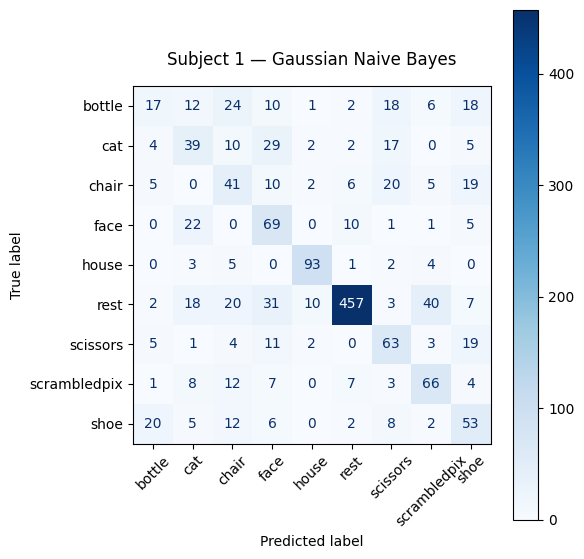


=== Subject 2 ===


[get_dataset_dir] Dataset found in ../data/haxby2001

X shape (time×voxels): (1452, 464)
LOO accuracy: 0.555
  Sensitivity (bottle): 0.611
  Sensitivity (cat): 0.315
  Sensitivity (chair): 0.269
  Sensitivity (face): 0.519
  Sensitivity (house): 0.657
  Sensitivity (rest): 0.772
  Sensitivity (scissors): 0.148
  Sensitivity (scrambledpix): 0.343
  Sensitivity (shoe): 0.398
Macro-average sensitivity: 0.448


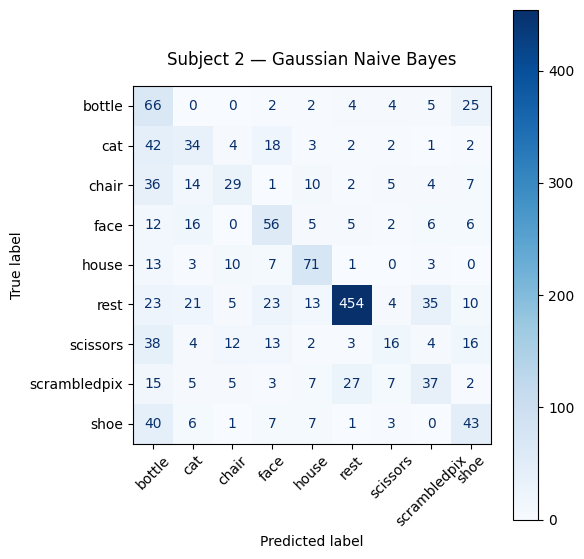


=== Subject 3 ===


[get_dataset_dir] Dataset found in ../data/haxby2001

X shape (time×voxels): (1452, 307)
LOO accuracy: 0.598
  Sensitivity (bottle): 0.389
  Sensitivity (cat): 0.528
  Sensitivity (chair): 0.287
  Sensitivity (face): 0.537
  Sensitivity (house): 0.852
  Sensitivity (rest): 0.711
  Sensitivity (scissors): 0.389
  Sensitivity (scrambledpix): 0.620
  Sensitivity (shoe): 0.565
Macro-average sensitivity: 0.542


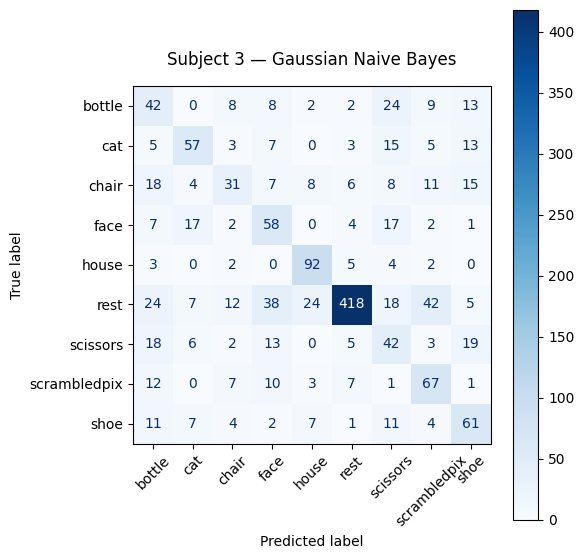


=== Subject 4 ===


[get_dataset_dir] Dataset found in ../data/haxby2001

X shape (time×voxels): (1452, 675)
LOO accuracy: 0.516
  Sensitivity (bottle): 0.259
  Sensitivity (cat): 0.167
  Sensitivity (chair): 0.333
  Sensitivity (face): 0.648
  Sensitivity (house): 0.722
  Sensitivity (rest): 0.718
  Sensitivity (scissors): 0.333
  Sensitivity (scrambledpix): 0.361
  Sensitivity (shoe): 0.204
Macro-average sensitivity: 0.416


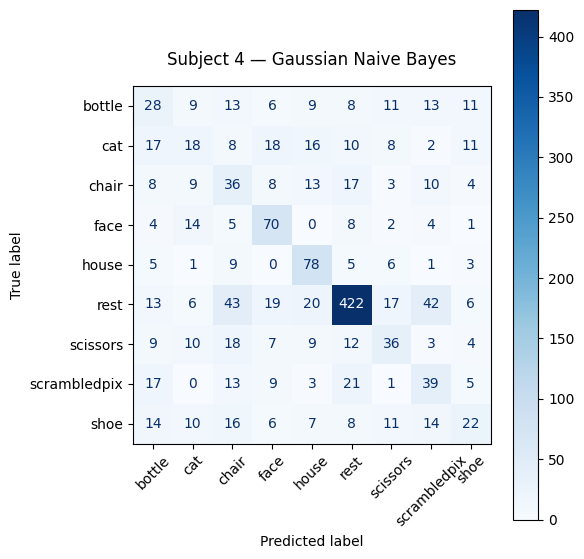


=== Subject 5 ===


[get_dataset_dir] Dataset found in ../data/haxby2001

X shape (time×voxels): (1452, 422)
LOO accuracy: 0.545
  Sensitivity (bottle): 0.222
  Sensitivity (cat): 0.424
  Sensitivity (chair): 0.414
  Sensitivity (face): 0.636
  Sensitivity (house): 0.727
  Sensitivity (rest): 0.618
  Sensitivity (scissors): 0.333
  Sensitivity (scrambledpix): 0.586
  Sensitivity (shoe): 0.525
Macro-average sensitivity: 0.499


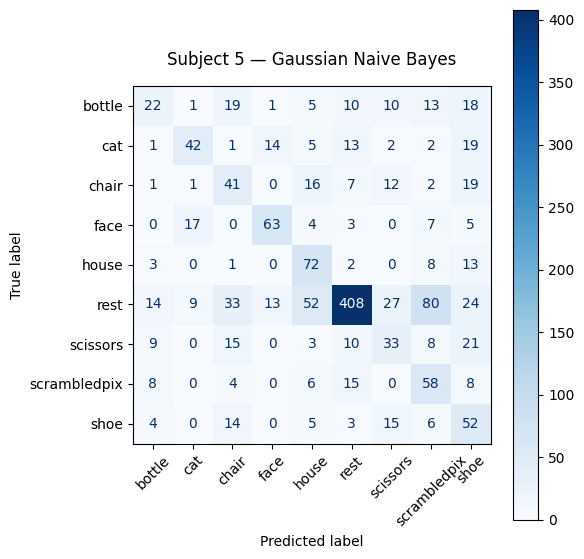


=== Subject 6 ===


[get_dataset_dir] Dataset found in ../data/haxby2001

X shape (time×voxels): (1452, 348)
LOO accuracy: 0.600
  Sensitivity (bottle): 0.278
  Sensitivity (cat): 0.537
  Sensitivity (chair): 0.370
  Sensitivity (face): 0.667
  Sensitivity (house): 0.843
  Sensitivity (rest): 0.757
  Sensitivity (scissors): 0.528
  Sensitivity (scrambledpix): 0.333
  Sensitivity (shoe): 0.389
Macro-average sensitivity: 0.522


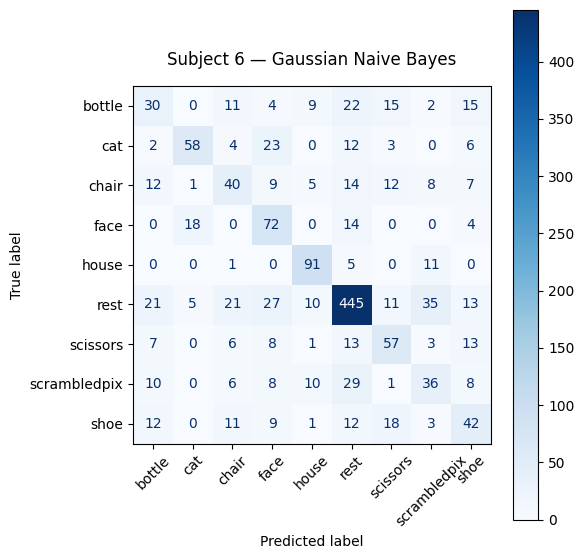

In [ ]:
for subj in subjects:
    print(f'\n=== Subject {subj} ===')
    haxby = datasets.fetch_haxby(data_dir=data_dir, subjects=[subj], fetch_stimuli=True)
    masker = NiftiMasker(mask_img=haxby.mask_vt[0], standardize=True, detrend=True)
    X = masker.fit_transform(haxby.func[0])
    print(f'X shape (time×voxels): {X.shape}')
    labels_df = pd.read_csv(haxby.session_target[0], sep=' ')
    y = labels_df['labels'].values
    labels = np.unique(y)

    # leave-one-out + GaussianNB
    loo    = LeaveOneOut()
    clf    = GaussianNB()
    y_pred = np.empty_like(y, dtype=object)
    for train_idx, test_idx in loo.split(X):
        clf.fit(X[train_idx], y[train_idx])
        y_pred[test_idx] = clf.predict(X[test_idx])

    # Accuracy
    acc = accuracy_score(y, y_pred)
    print(f'LOO accuracy: {acc:.3f}')

    # sensitivity
    sens_per_class = recall_score(y, y_pred, labels=labels, average=None)
    for lbl, sens in zip(labels, sens_per_class):
        print(f'  Sensitivity ({lbl}): {sens:.3f}')
    macro_sens = recall_score(y, y_pred, average='macro')
    print(f'Macro-average sensitivity: {macro_sens:.3f}')

    # Confusion matrix
    cm = confusion_matrix(y, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    fig, ax = plt.subplots(figsize=(6,6))
    disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=True, xticks_rotation=45)
    ax.set_title(f'Subject {subj} — Gaussian Naive Bayes', pad=15)
    plt.tight_layout()
    plt.show()

**Section 4. LDA**



=== Subject 1 — LDA with PCA (50 components) ===
X shape (time×voxels): (1452, 577)
Accuracy = 0.911, macro-sensitivity = 0.898
   Sensitivity(bottle) = 0.713
   Sensitivity(cat) = 0.926
   Sensitivity(chair) = 0.843
   Sensitivity(face) = 0.944
   Sensitivity(house) = 1.000
   Sensitivity(rest) = 0.937
   Sensitivity(scissors) = 0.898
   Sensitivity(scrambledpix) = 0.981
   Sensitivity(shoe) = 0.843


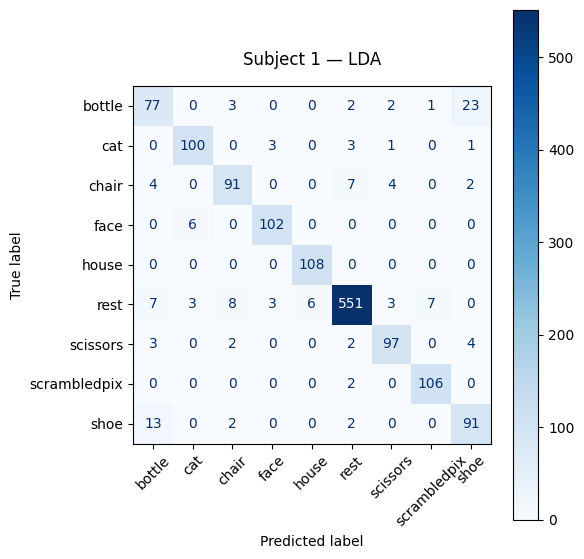


=== Subject 2 — LDA with PCA (50 components) ===
X shape (time×voxels): (1452, 464)
Accuracy = 0.879, macro-sensitivity = 0.843
   Sensitivity(bottle) = 0.694
   Sensitivity(cat) = 0.880
   Sensitivity(chair) = 0.787
   Sensitivity(face) = 0.852
   Sensitivity(house) = 0.991
   Sensitivity(rest) = 0.951
   Sensitivity(scissors) = 0.704
   Sensitivity(scrambledpix) = 0.926
   Sensitivity(shoe) = 0.806


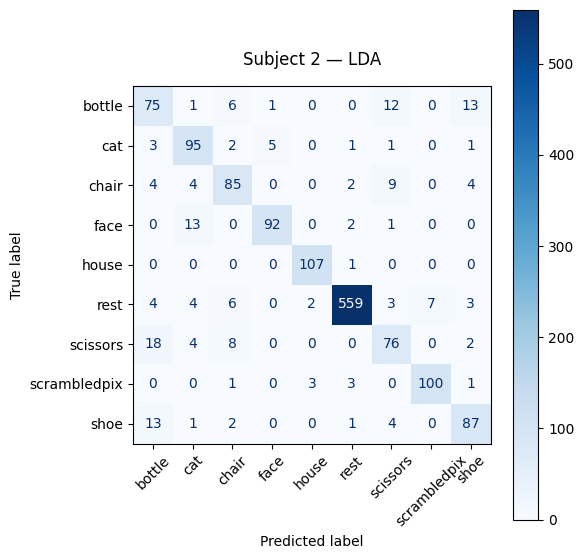


=== Subject 3 — LDA with PCA (50 components) ===
X shape (time×voxels): (1452, 307)
Accuracy = 0.794, macro-sensitivity = 0.753
   Sensitivity(bottle) = 0.537
   Sensitivity(cat) = 0.787
   Sensitivity(chair) = 0.694
   Sensitivity(face) = 0.713
   Sensitivity(house) = 0.935
   Sensitivity(rest) = 0.878
   Sensitivity(scissors) = 0.620
   Sensitivity(scrambledpix) = 0.833
   Sensitivity(shoe) = 0.778


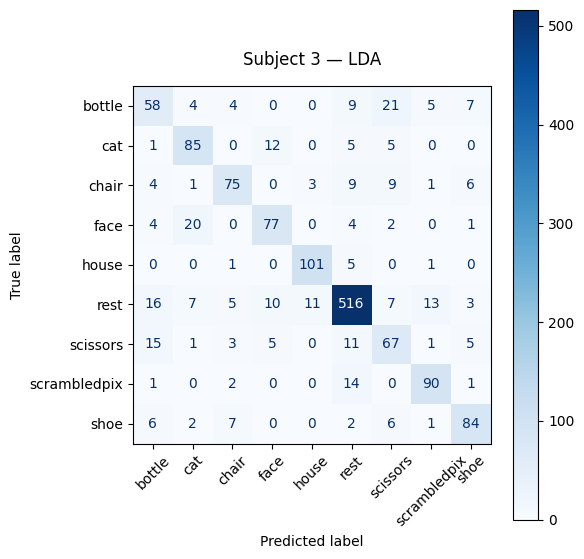


=== Subject 4 — LDA with PCA (50 components) ===
X shape (time×voxels): (1452, 675)
Accuracy = 0.781, macro-sensitivity = 0.722
   Sensitivity(bottle) = 0.435
   Sensitivity(cat) = 0.769
   Sensitivity(chair) = 0.583
   Sensitivity(face) = 0.898
   Sensitivity(house) = 0.926
   Sensitivity(rest) = 0.901
   Sensitivity(scissors) = 0.546
   Sensitivity(scrambledpix) = 0.852
   Sensitivity(shoe) = 0.583


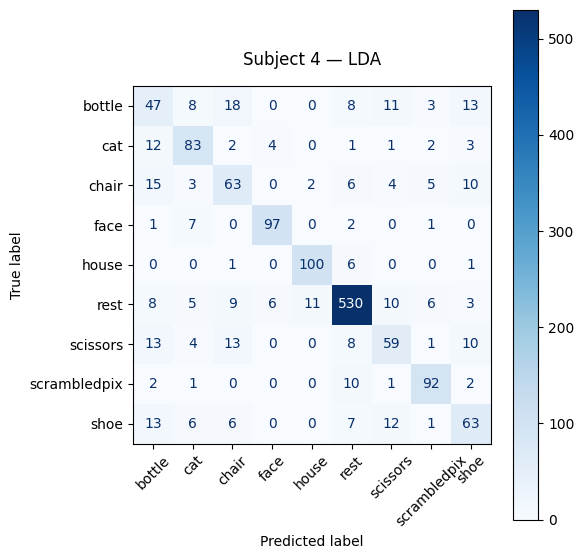


=== Subject 5 — LDA with PCA (50 components) ===
X shape (time×voxels): (1452, 422)
Accuracy = 0.831, macro-sensitivity = 0.808
   Sensitivity(bottle) = 0.677
   Sensitivity(cat) = 0.879
   Sensitivity(chair) = 0.788
   Sensitivity(face) = 0.909
   Sensitivity(house) = 0.899
   Sensitivity(rest) = 0.867
   Sensitivity(scissors) = 0.667
   Sensitivity(scrambledpix) = 0.848
   Sensitivity(shoe) = 0.737


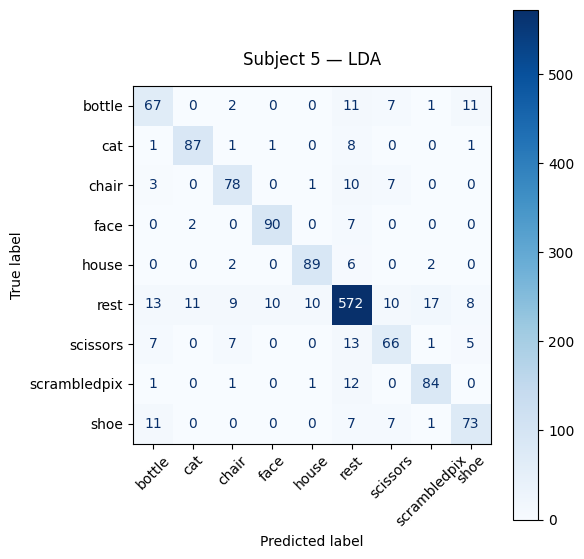


=== Subject 6 — LDA with PCA (50 components) ===
X shape (time×voxels): (1452, 348)
Accuracy = 0.799, macro-sensitivity = 0.762
   Sensitivity(bottle) = 0.454
   Sensitivity(cat) = 0.907
   Sensitivity(chair) = 0.657
   Sensitivity(face) = 0.917
   Sensitivity(house) = 0.917
   Sensitivity(rest) = 0.874
   Sensitivity(scissors) = 0.750
   Sensitivity(scrambledpix) = 0.731
   Sensitivity(shoe) = 0.648


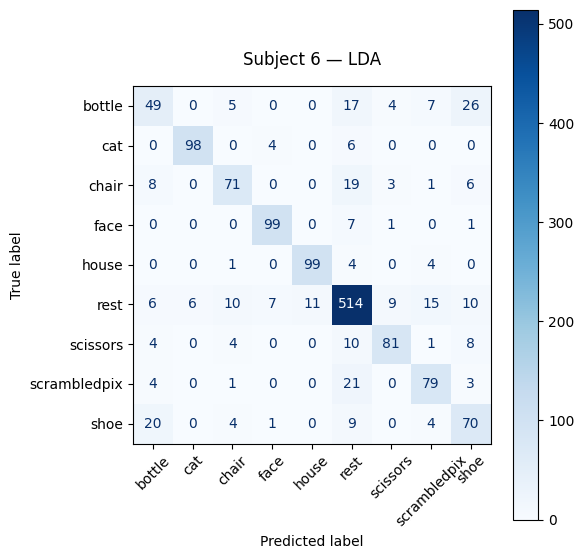

In [ ]:
data_dir = os.path.join('..', 'data')

# Fetch all subjects at once
haxby_all = datasets.fetch_haxby(data_dir=data_dir, subjects=subjects, fetch_stimuli=True, verbose=0)

# Define PCA + LDA pipeline
n_components = 50
pipe = make_pipeline(PCA(n_components=n_components, whiten=True), LinearDiscriminantAnalysis())

# Loop over subjects and evaluate LDA
for idx, subj in enumerate(subjects):
    print(f"\n=== Subject {subj} — LDA with PCA ({n_components} components) ===")
    func_file   = haxby_all.func[idx]
    mask_file   = haxby_all.mask_vt[idx]
    target_file = haxby_all.session_target[idx]

    # Mask and transform 4D fMRI to (timepoints × voxels)
    masker = NiftiMasker(mask_img=mask_file, standardize=True, detrend=True)
    X = masker.fit_transform(func_file)
    print(f'X shape (time×voxels): {X.shape}')

    # Load labels
    y = pd.read_csv(target_file, sep=' ')['labels'].values
    labels = np.unique(y)

    # Parallel Leave-One-Out cross-validated predictions
    y_pred = cross_val_predict(pipe, X, y, cv=LeaveOneOut(), n_jobs=-1)

    # Compute metrics
    acc = accuracy_score(y, y_pred)
    macro_sens = recall_score(y, y_pred, average='macro')
    sens_per_class = recall_score(y, y_pred, labels=labels, average=None)

    # Print results
    print(f"Accuracy = {acc:.3f}, macro-sensitivity = {macro_sens:.3f}")
    for lbl, sens in zip(labels, sens_per_class):
        print(f"   Sensitivity({lbl}) = {sens:.3f}")

    # Plot confusion matrix
    cm = confusion_matrix(y, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=True, xticks_rotation=45)
    ax.set_title(f"Subject {subj} — LDA", pad=15)
    plt.tight_layout()
    plt.show()


**Section 4. QDA**


=== Subject 1 — QDA with PCA (50 components) ===
X shape (time×voxels): (1452, 577)
Accuracy = 0.845, macro-sensitivity = 0.777
   Sensitivity(bottle) = 0.704
   Sensitivity(cat) = 0.806
   Sensitivity(chair) = 0.667
   Sensitivity(face) = 0.870
   Sensitivity(house) = 0.861
   Sensitivity(rest) = 0.983
   Sensitivity(scissors) = 0.759
   Sensitivity(scrambledpix) = 0.648
   Sensitivity(shoe) = 0.694


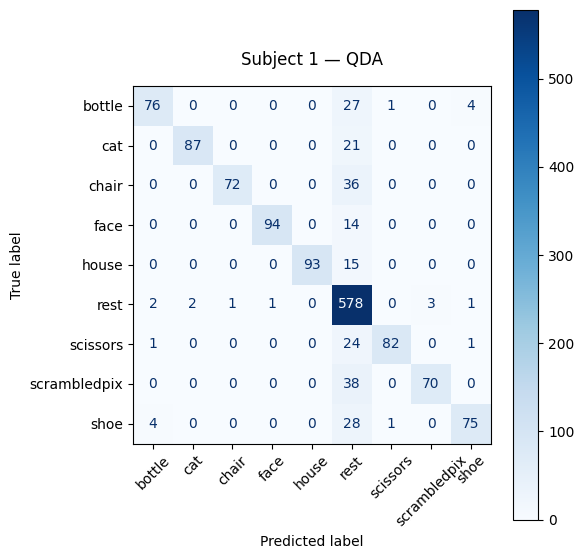


=== Subject 2 — QDA with PCA (50 components) ===
X shape (time×voxels): (1452, 464)
Accuracy = 0.806, macro-sensitivity = 0.718
   Sensitivity(bottle) = 0.630
   Sensitivity(cat) = 0.694
   Sensitivity(chair) = 0.648
   Sensitivity(face) = 0.778
   Sensitivity(house) = 0.852
   Sensitivity(rest) = 0.985
   Sensitivity(scissors) = 0.639
   Sensitivity(scrambledpix) = 0.639
   Sensitivity(shoe) = 0.602


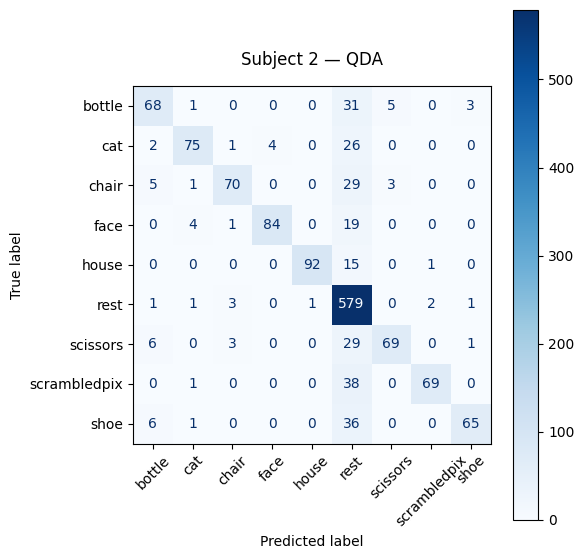


=== Subject 3 — QDA with PCA (50 components) ===
X shape (time×voxels): (1452, 307)
Accuracy = 0.659, macro-sensitivity = 0.514
   Sensitivity(bottle) = 0.389
   Sensitivity(cat) = 0.454
   Sensitivity(chair) = 0.380
   Sensitivity(face) = 0.546
   Sensitivity(house) = 0.620
   Sensitivity(rest) = 0.952
   Sensitivity(scissors) = 0.407
   Sensitivity(scrambledpix) = 0.380
   Sensitivity(shoe) = 0.500


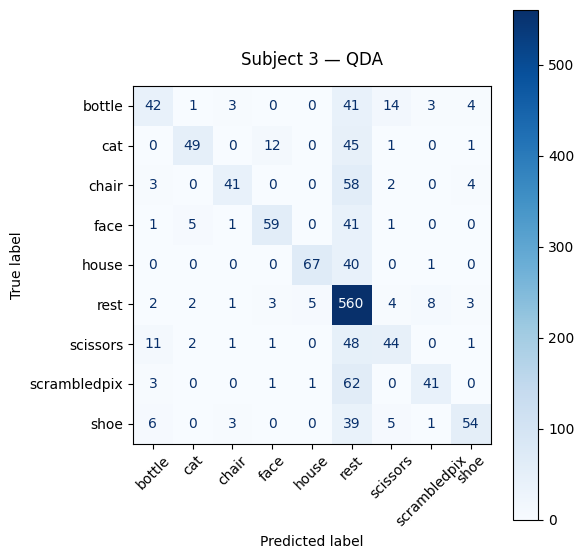


=== Subject 4 — QDA with PCA (50 components) ===
X shape (time×voxels): (1452, 675)
Accuracy = 0.803, macro-sensitivity = 0.721
   Sensitivity(bottle) = 0.648
   Sensitivity(cat) = 0.704
   Sensitivity(chair) = 0.611
   Sensitivity(face) = 0.806
   Sensitivity(house) = 0.787
   Sensitivity(rest) = 0.969
   Sensitivity(scissors) = 0.611
   Sensitivity(scrambledpix) = 0.694
   Sensitivity(shoe) = 0.657


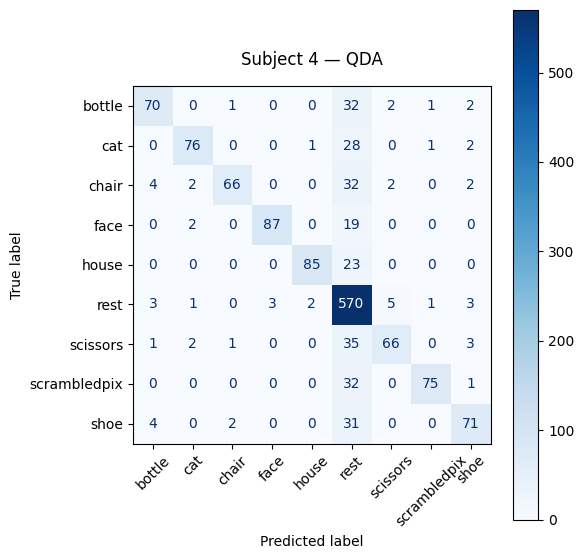


=== Subject 5 — QDA with PCA (50 components) ===
X shape (time×voxels): (1452, 422)
Accuracy = 0.685, macro-sensitivity = 0.522
   Sensitivity(bottle) = 0.384
   Sensitivity(cat) = 0.495
   Sensitivity(chair) = 0.434
   Sensitivity(face) = 0.626
   Sensitivity(house) = 0.586
   Sensitivity(rest) = 0.944
   Sensitivity(scissors) = 0.374
   Sensitivity(scrambledpix) = 0.414
   Sensitivity(shoe) = 0.444


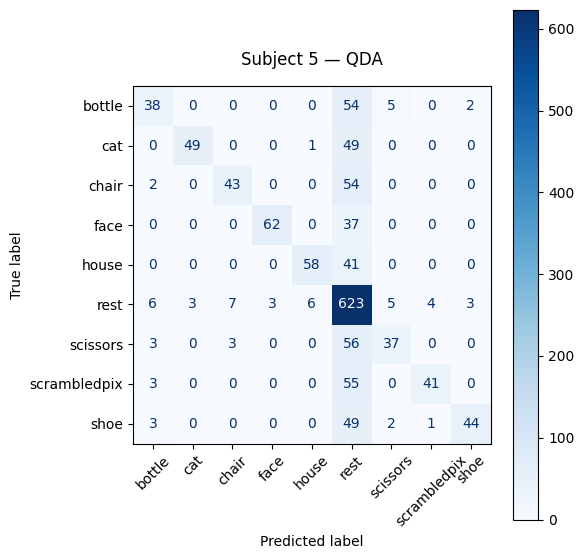


=== Subject 6 — QDA with PCA (50 components) ===
X shape (time×voxels): (1452, 348)
Accuracy = 0.623, macro-sensitivity = 0.461
   Sensitivity(bottle) = 0.278
   Sensitivity(cat) = 0.537
   Sensitivity(chair) = 0.259
   Sensitivity(face) = 0.602
   Sensitivity(house) = 0.657
   Sensitivity(rest) = 0.951
   Sensitivity(scissors) = 0.306
   Sensitivity(scrambledpix) = 0.250
   Sensitivity(shoe) = 0.306


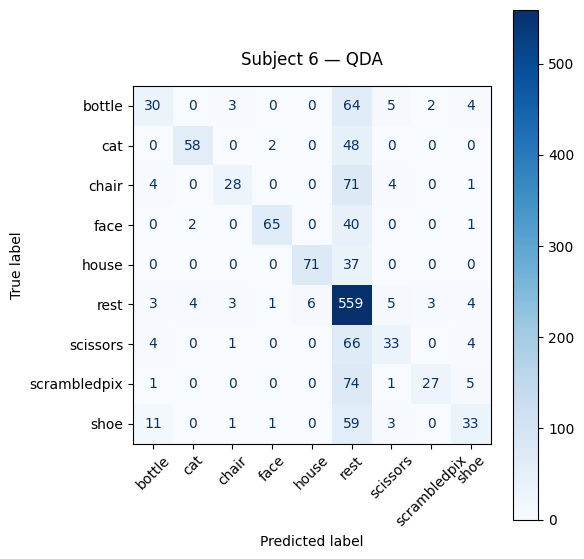

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Subjects to process
subjects = [1, 2, 3, 4, 5, 6]

# Fetch all subjects once (silent)
haxby_all = datasets.fetch_haxby(data_dir=data_dir, subjects=subjects, fetch_stimuli=True, verbose=0)

# Define PCA + QDA pipeline
n_components = 50
pipe = make_pipeline(PCA(n_components=n_components, whiten=True), QuadraticDiscriminantAnalysis())

# Loop over subjects and evaluate QDA
for idx, subj in enumerate(subjects):
    print(f"\n=== Subject {subj} — QDA with PCA ({n_components} components) ===")
    func_file   = haxby_all.func[idx]
    mask_file   = haxby_all.mask_vt[idx]
    target_file = haxby_all.session_target[idx]

    # Mask and reshape 4D fMRI data to (timepoints × voxels)
    masker = NiftiMasker(mask_img=mask_file, standardize=True, detrend=True)
    X = masker.fit_transform(func_file)
    print(f'X shape (time×voxels): {X.shape}')

    # Load labels
    y = pd.read_csv(target_file, sep=' ')['labels'].values
    labels = np.unique(y)

    # Parallel Leave-One-Out predictions
    y_pred = cross_val_predict(pipe, X, y, cv=LeaveOneOut(), n_jobs=-1)

    # Compute accuracy and sensitivity metrics
    acc = accuracy_score(y, y_pred)
    macro_sens = recall_score(y, y_pred, average='macro')
    sens_per_class = recall_score(y, y_pred, labels=labels, average=None)

    # Print results
    print(f"Accuracy = {acc:.3f}, macro-sensitivity = {macro_sens:.3f}")
    for lbl, sens in zip(labels, sens_per_class):
        print(f"   Sensitivity({lbl}) = {sens:.3f}")

    # Plot confusion matrix
    cm = confusion_matrix(y, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    fig, ax = plt.subplots(figsize=(6, 6))
    disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=True, xticks_rotation=45)
    ax.set_title(f"Subject {subj} — QDA", pad=15)
    plt.tight_layout()
    plt.show()


**Section 5. Discussion **

* For all the classifiers, we observe the following consistency between all of the subjects: there are negligible/near zero values on the off-digonal elements in the confusion matrix and high ranking for the digonal elements as they are centralized around a value of 100.

* Special case of the diagonal terms is the case for rest which seems to be highly differentiated from the rest of the elements as it's range of values are approximately 400-650. (usually centralized around 530)  

* For KNN, the index of K increases, respectively, for most subjects the value of accuracy increments and the maximal value for each subject is at K = 4. Apart from subject 3, which in his/her case have maximal accuracy at K = 3.

* For LogReg, we observe unusual performance for the "labels" label, as it gives a zero value at it's diagonal elements. this is because labels is not a real stimulus category in the Haxby dataset—it is just the column header that appears in the first line of, session_target.txt. Hence, there is exactly one sample whose true label is the string 'labels', but the logistic regression model never predicted that class (it only predicts the nine legitimate categories).
Additionally, the change in accuracy for each subject doesn't necessarily hint for a change in the values of the diagonal, as it's within margin of error.

* For Gaussian NB, we observe poor performance across the diagonal,except for rest. Due to the lower values which are statistiaclly much closer to the off-diagonal elements then closer to 100, compared to the other classifier. Moreover, there are several off-diagonal terms which have significant values, (e.g. rest x scrabledpix elements = 40) which hints towards a substantial correlation with the sensitivity as it's respectively with poor performace (cat = 0.361 in subject 1 etc.)
Lastly, we can see another hints towards poor performance as there's wide variance between the confusion matrix for each of the subjects as it appear to have different off-diagonal elements with high values.

* For LDA, we observe similar performace both in off/digonal values as well as sensitivity values with respect to KNN and LR


* For QDA, we observe a decrement in performance, as all values across the diagonal (except for rest) are lower and so it the senesitivty for each label. Additionally, in the predicted rest column it appears that the elements have also substantial increment in value which is closer to the ones in the diagonal.

We also statistically compare the accuracy performance between the classifiers:
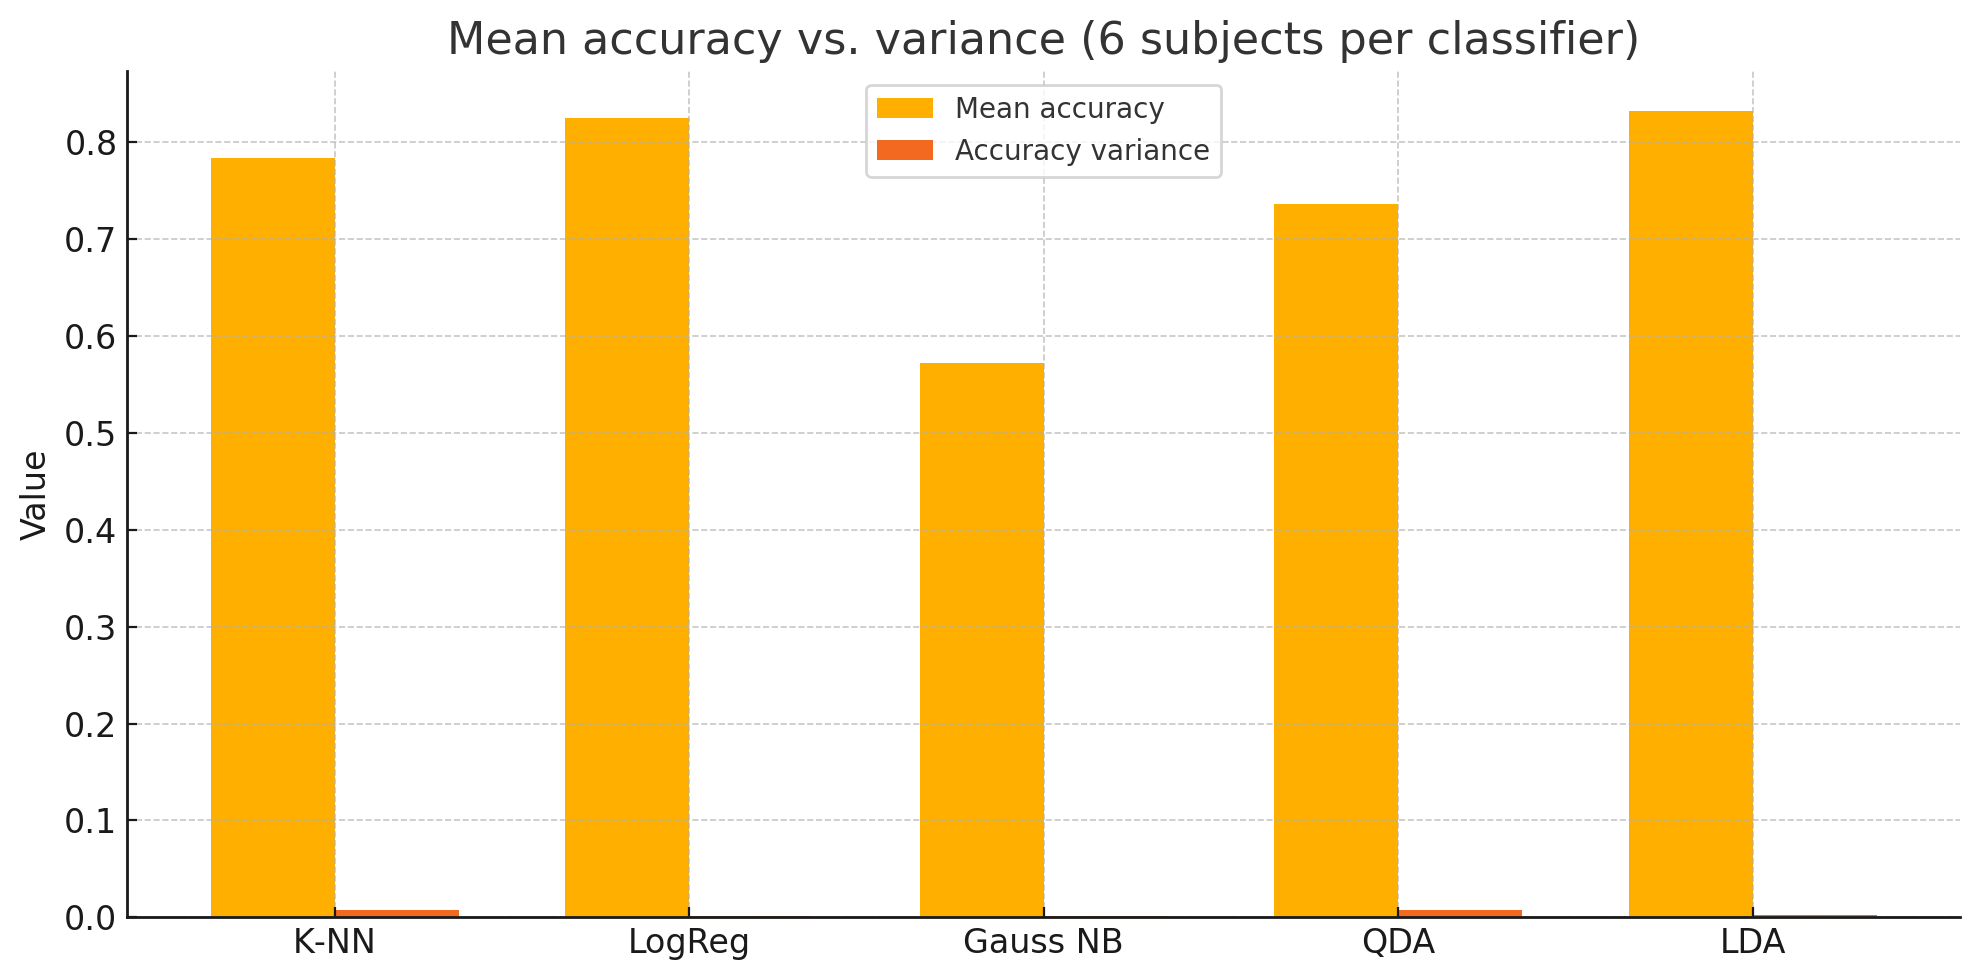







Also in table form:

| Classifier           | Mean accuracy | Variance    |
| -------------------- | ------------- | ----------- |
| K‑NN                 | 0.784         | 0.00712 |
| Logistic Regression  | **0.825**         | **0.00108**     |
| Gaussian Naïve Bayes | 0.572         | 0.00129     |
| QDA                  | 0.737         | 0.00709     |
| **LDA**              | **0.833**     | **0.00226**     |

based on the confusion matrix results, sensitivity and accuracy, we infer that **LogReg** and afterwards **LDA** are the best performing as their confusion
matrix is "clean" in the sense that it differentiate very sharply between on and off diagonal terms across the subjects, and they have amoung the least amount of accuracy variance compared to the other classifiers making in much more consistent. LDA may have an increment of better accuracy but aside it's variance is twice as much as LogReg's, there are more off-diagonal terms with higher  inaccurate values. This must be taken into account, especially when cosidering real world scenarios.

Finally we can also deduce that from the below 1% variance for all of the classifiers, they are all consistent in this study.